__status  狀態值解釋__
* 0       : 健康的人
* 1~50    : 受感染但'沒有'傳染力 (正常更新時+1)
* 51~500  : 受感染且有傳染力 (正常更新時+1)
* 501~600 : 死亡or隔離(無傳染力), 單純是畫面顯示需要 (正常更新時+1)
* 601     : 不再更新狀態

__r__ (float) (約0.001~0.002) 接觸距離(半徑)

__n__ (int) 點位數量 (1000) 太少可以增加 r 提高接觸機會


In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import time
from matplotlib.animation import FuncAnimation
from sklearn.metrics.pairwise import manhattan_distances  # 曼哈頓距離可以省大量計算

In [2]:
n = 999
n2 = n
r = 1
r_ = 0.0015 # 距離設定 微調影響很顯著 約0.001~0.002
p = (r_**2 * np.pi * r) # 初始感染率

status = np.zeros(n+1).astype(np.int)
status[0] = 51
ind = 1 # 追加新病人的index
n_arr = [n] # 初始狀態init
r_arr = [r] # 初始狀態init

for i in range(10000):
    r_n = np.random.binomial(n, p) # 二項分布 直接求可能的數字
    # r_n = np.random.choice(2, n, p=[1 - p, p]).sum() # 等於上面
    if r_n:
        status[ind:ind+r_n] = 1
        ind += r_n
    status[np.bitwise_and(status > 0, status <= 500)] += 1
    r = len(status[np.bitwise_and(status > 50, status <= 500)]) # 超過51才有傳染力
    p = (r_**2 * np.pi * r) # 這裡忽略病人同時可能佔據的空間機率
    n -= r_n
    n_arr.append(n)
    r_arr.append(r)
#     print(f'n:{n}, r:{r}, bk:{n2+1-n-r}, r_n:{r_n}')
    if r == 0 or n == 0:
        break

(0, 1000)

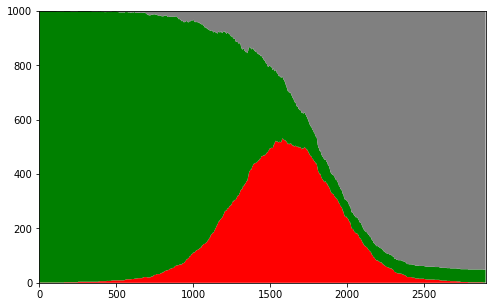

In [3]:
nrr = np.array(n_arr).astype(np.int)
rrr = np.array(r_arr).astype(np.int)
bkrr = n2 - nrr - rrr
step = i + 2
x = np.arange(step)

plt.figure(figsize=(8, 5))
plt.stackplot(x, rrr, nrr, bkrr, colors=['r', 'g', 'gray'])
plt.xlim([0, step])
plt.ylim([0, 1000])